In [12]:
import numpy as np
from astropy.io import fits
import joblib
from joblib import Parallel, delayed, cpu_count
import matplotlib.pyplot as plt

In [2]:
#weights are obtained such that : n_mean=0.65=0.5*lambda + 1*(1-lambda) 

In [3]:
kappas_z05 = ['/Users/vajani/Desktop/CFIS/convergence_gal_mnv0.10000_om0.30000_As2.1000/Maps_05/WLconv_z0.50_{file_num:04d}r.fits'.format(file_num=n)  for n in range(1,21)]
kappas_z10 = ['/Users/vajani/Desktop/CFIS/convergence_gal_mnv0.10000_om0.30000_As2.1000/Maps_10/WLconv_z1.00_{file_num:04d}r.fits'.format(file_num=n)  for n in range(1,21)]

In [4]:
kappa_maps_z05=np.array([fits.getdata(kappas_z05[i]) for i in range(len(kappas_z05))])
kappa_maps_z10=np.array([fits.getdata(kappas_z10[i]) for i in range(len(kappas_z10))])

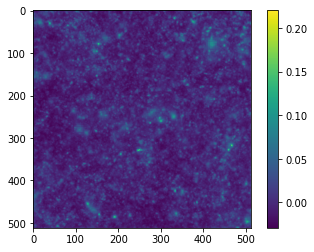

In [14]:
plt.imshow(kappa_maps_z10[0])
plt.colorbar()

In [5]:
lambda_param=0.7

In [15]:
def kappa_eff(kappa_z05,kappa_z10, lambda_param):
    
    kappa_z065 = lambda_param*kappa_z05 + kappa_z10*(1 - lambda_param)
    
    return kappa_z065

In [17]:
kappas_z065=np.array(Parallel(n_jobs=8, verbose=5)(delayed(kappa_eff)(kappa_maps_z05[i],kappa_maps_z10[i],lambda_param=lambda_param) for i in range(1,20) ))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of  19 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  12 out of  19 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  16 out of  19 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  19 out of  19 | elapsed:    0.3s finished


In [18]:
kappas_z065.shape

(19, 512, 512)

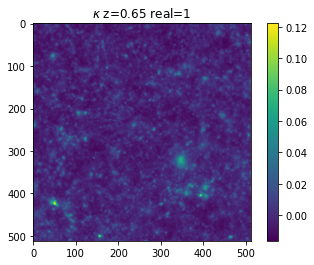

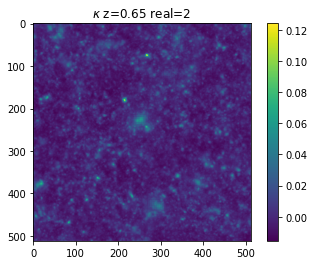

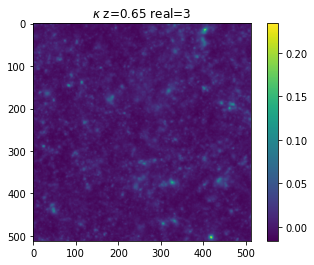

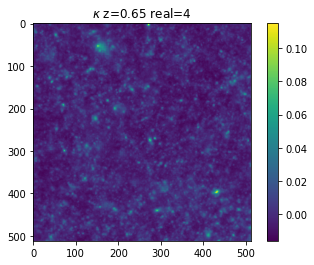

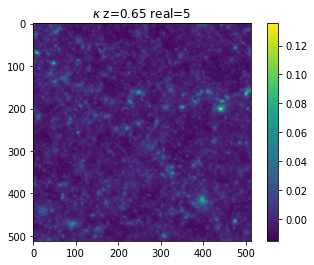

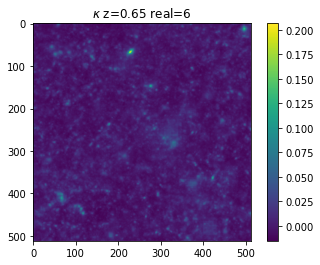

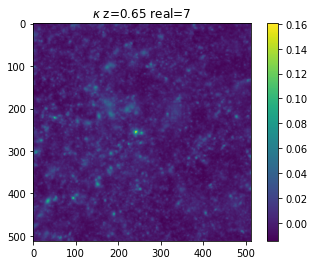

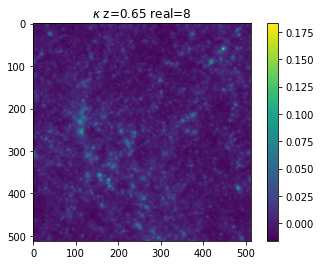

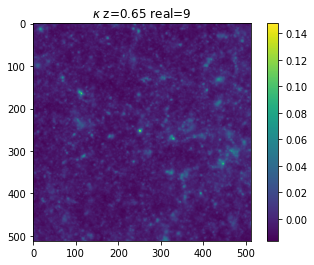

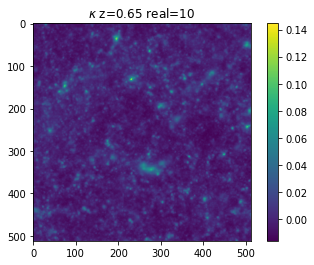

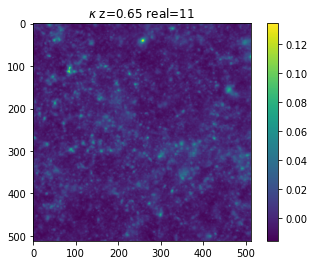

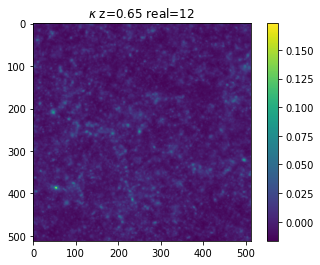

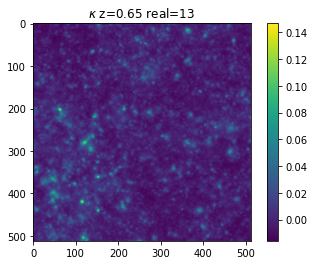

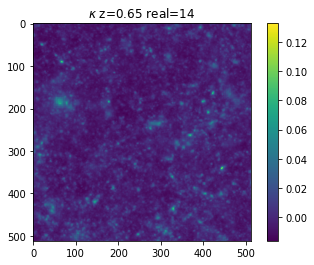

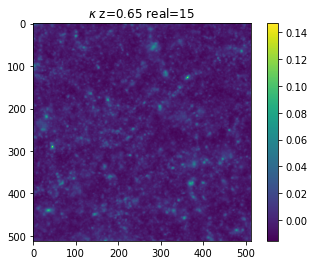

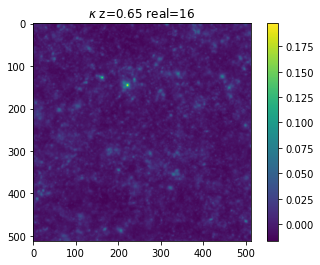

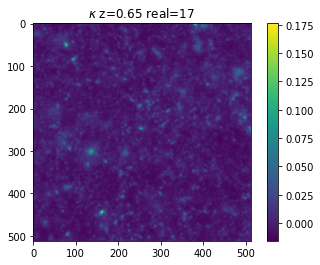

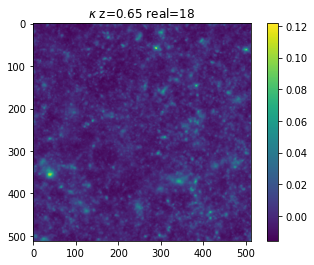

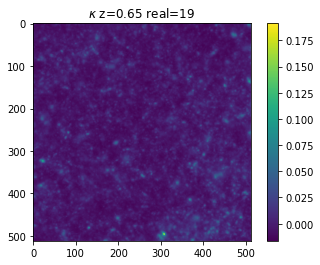

In [32]:
for i in range(19):
    plt.imshow(kappas_z065[i])
    plt.colorbar()
    plt.title('$\kappa$ z=0.65 real={}'.format(i+1))
    plt.show()